# Assignment 8 (Deep Learning)

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader
import torch.nn.functional as F
from collections import OrderedDict

In [2]:
np.random.seed(0)

In [3]:
data = 2*np.random.uniform(size=(10000, 2)) - 1

In [4]:
labels = np.zeros(shape=(10000))

In [5]:
for i in range(len(labels)):
    if data[i,0]*data[i,1] > 0:
        labels[i] = 1
   

In [6]:
train_data = torch.from_numpy(data[:(70*len(data))//100,:])
valid_data = torch.from_numpy(data[(70*len(data))//100:(85*len(data))//100,:])
test_data = torch.from_numpy(data[(85*len(data))//100:,:])
train_labels = torch.from_numpy(labels[:(70*len(data))//100])
valid_labels = torch.from_numpy(labels[(70*len(data))//100:(85*len(data))//100])
test_labels = torch.from_numpy(labels[(85*len(data))//100:])

In [7]:
class XOR(torch.utils.data.Dataset):
    def __init__(self,data,labels):
        self.data = data
        self.labels = labels
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        return self.data[index],self.labels[index]

In [8]:
train_data = XOR(train_data,train_labels)
valid_data = XOR(valid_data,valid_labels)
test_data = XOR(test_data,test_labels)

In [9]:
train_dataloader = DataLoader(train_data, batch_size=16, shuffle=True,drop_last=True)
valid_dataloader = DataLoader(valid_data, batch_size=16, shuffle=True,drop_last=True)
test_dataloader = DataLoader(test_data, batch_size=16, shuffle=True,drop_last=True)

In [10]:
class Net(nn.Module):
    def __init__(self,input_shape,hidden_size=4):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_shape,hidden_size)
        self.fc2 = nn.Linear(hidden_size,1)
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [11]:
learning_rate = 1e-3
model = Net(input_shape=2)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [12]:
valid_x = data[(70*len(data))//100:(85*len(data))//100,:]
valid_y = labels[(70*len(data))//100:(85*len(data))//100]
train_x = data[:(70*len(data))//100,:]
train_y = labels[:(70*len(data))//100]

In [13]:
train_losses = []
valid_accur = []
train_accur = []
valid_losses = []
epochs = 100
for i in range(epochs):
    epoch_train_loss = []
    for j,(x_train,y_train) in enumerate(train_dataloader):
        #calculate output
        output = model(x_train.float())
        y_train = y_train.unsqueeze(1)
 
        #calculate loss
        train_loss = loss_fn(output,y_train.float())
        epoch_train_loss.append(train_loss)
        #print(loss.item())
         
        
        #backprop
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
    
    epoch_train_loss = [element.detach().numpy() for element in epoch_train_loss]
    epoch_train_loss = np.array(epoch_train_loss)
    epoch_train_loss = np.mean(epoch_train_loss)

    #validation loss/accuracy
    predicted = model(torch.tensor(valid_x,dtype=torch.float32))
    valid_acc = (predicted.reshape(-1).detach().numpy().round() == valid_y).mean()
    dummy_y = torch.tensor(valid_y)
    dummy_y = dummy_y.unsqueeze(1)
    valid_loss = loss_fn(predicted,dummy_y.float())
    
    #Training dataset accuracy
    train_predicted = model(torch.tensor(train_x,dtype=torch.float32))
    train_acc = (train_predicted.reshape(-1).detach().numpy().round() == train_y).mean()
    
    train_losses.append(epoch_train_loss)
    valid_accur.append(valid_acc)
    valid_losses.append(valid_loss)
    train_accur.append(train_acc)


    #print(f"Epoch {i+1}\n-------------------------------")
    #print(f"Valid loss : {valid_loss} Validation accuracy : {valid_acc} \n")
    #print(f"Train loss : {epoch_train_loss} Train accuracy : {train_acc} \n")


In [14]:
epoches = [i+1 for i in range(100)]

In [15]:
#train_losses = [element.detach().numpy() for element in train_losses]
valid_losses = [element.detach().numpy() for element in valid_losses]

### Training Loss/Accuracy and Validation Loss/Accuracy for Hidden Layer size = 4 and Learning Rate = 1e-3

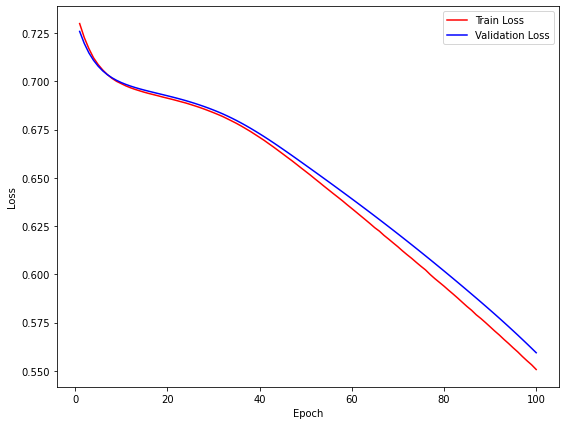

In [16]:
fig = plt.figure(figsize=(9,7))
plt.plot(epoches,train_losses,color="r")
plt.plot(epoches,valid_losses,color='b')
plt.legend(["Train Loss","Validation Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

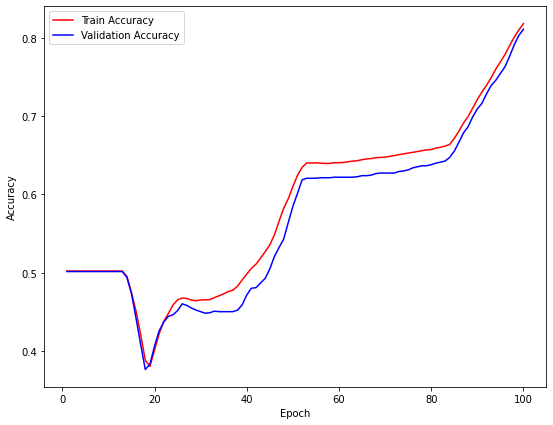

In [17]:
fig = plt.figure(figsize=(9,7))
plt.plot(epoches,train_accur,color="r")
plt.plot(epoches,valid_accur,color='b')
plt.legend(["Train Accuracy","Validation Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

### Best Validation Loss for Hidden Layer size  (2,4,6,8,10)

In [18]:
best_valid_loss = []

In [19]:
for hidden_size in [2,4,6,8,10]:
    
    #print('\033[1m'+f"Hidden Layer Size : {hidden_size}"+ '\033[0m')
    learning_rate = 1e-3
    model_h = Net(input_shape=2,hidden_size=hidden_size)
    optimizer_h = torch.optim.SGD(model_h.parameters(),lr=learning_rate)
    loss_fn = nn.BCELoss()
    train_losses_h = []
    valid_accur_h = []
    train_accur_h = []
    valid_losses_h = []
    epochs = 100
    
    for i in range(epochs):
        epoch_train_loss_h = []
        for j,(x_train,y_train) in enumerate(train_dataloader):
            #calculate output
            output = model_h(x_train.float())
            y_train = y_train.unsqueeze(1)
 
            #calculate loss
            train_loss = loss_fn(output,y_train.float())
            epoch_train_loss_h.append(train_loss)
            #print(loss.item())
         
        
            #backprop
            optimizer_h.zero_grad()
            train_loss.backward()
            optimizer_h.step()
    
        epoch_train_loss_h = [element.detach().numpy() for element in epoch_train_loss_h]
        epoch_train_loss_h = np.array(epoch_train_loss_h)
        epoch_train_loss_h = np.mean(epoch_train_loss_h)

        #validation loss/accuracy
        predicted = model_h(torch.tensor(valid_x,dtype=torch.float32))
        valid_acc = (predicted.reshape(-1).detach().numpy().round() == valid_y).mean()
        dummy_y = torch.tensor(valid_y)
        dummy_y = dummy_y.unsqueeze(1)
        valid_loss = loss_fn(predicted,dummy_y.float())
    
        #Training dataset accuracy
        train_predicted = model_h(torch.tensor(train_x,dtype=torch.float32))
        train_acc = (train_predicted.reshape(-1).detach().numpy().round() == train_y).mean()
    
        train_losses_h.append(epoch_train_loss_h)
        valid_accur_h.append(valid_acc)
        valid_losses_h.append(valid_loss)
        train_accur_h.append(train_acc)
        #print(f"Epoch {i+1}\n-------------------------------")
        #print(f"Valid loss : {valid_loss} Validation accuracy : {valid_acc} \n")
        #print(f"Train loss : {epoch_train_loss_h} Train accuracy : {train_acc} \n")

        
    best_valid_loss.append(valid_losses_h)


        


In [20]:
for i in range(len(best_valid_loss)):
    best_valid_loss[i] = [element.detach().numpy() for element in best_valid_loss[i]]

In [21]:
best_valid_loss = np.array(best_valid_loss)

In [22]:
best_valid_loss.shape

(5, 100)

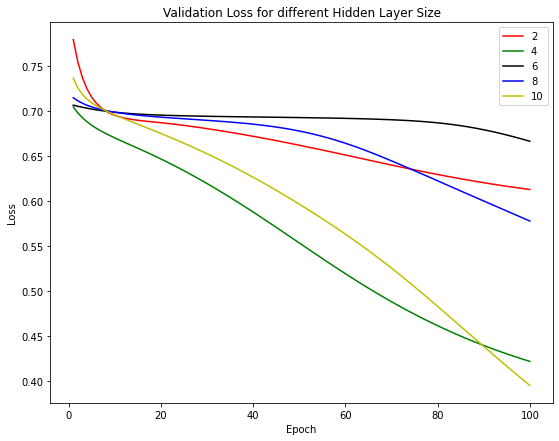

In [23]:
fig = plt.figure(figsize=(9,7))

for valid_loss_hidden,color in zip(best_valid_loss,["r",'g','k','b','y']):
    plt.plot(epoches,valid_loss_hidden,color=color)

plt.title("Validation Loss for different Hidden Layer Size")
plt.legend(["2","4","6",'8','10'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [24]:
best_valid_loss_lr = []

In [25]:
for learning_rate in [1e-5,1e-4,1e-3,1e-2,1e-1]:
    
    #print('\033[1m'+f"Learning Rate : {learning_rate}"+ '\033[0m')
    model_h = Net(input_shape=2)
    optimizer_h = torch.optim.SGD(model_h.parameters(),lr=learning_rate)
    loss_fn = nn.BCELoss()
    train_losses_h = []
    valid_accur_h = []
    train_accur_h = []
    valid_losses_h = []
    epochs = 20
    
    for i in range(epochs):
        epoch_train_loss_h = []
        for j,(x_train,y_train) in enumerate(train_dataloader):
            #calculate output
            output = model_h(x_train.float())
            y_train = y_train.unsqueeze(1)
 
            #calculate loss
            train_loss = loss_fn(output,y_train.float())
            epoch_train_loss_h.append(train_loss)
            #print(loss.item())
         
        
            #backprop
            optimizer_h.zero_grad()
            train_loss.backward()
            optimizer_h.step()
    
        epoch_train_loss_h = [element.detach().numpy() for element in epoch_train_loss_h]
        epoch_train_loss_h = np.array(epoch_train_loss_h)
        epoch_train_loss_h = np.mean(epoch_train_loss_h)

        #validation loss/accuracy
        predicted = model_h(torch.tensor(valid_x,dtype=torch.float32))
        valid_acc = (predicted.reshape(-1).detach().numpy().round() == valid_y).mean()
        dummy_y = torch.tensor(valid_y)
        dummy_y = dummy_y.unsqueeze(1)
        valid_loss = loss_fn(predicted,dummy_y.float())
    
        #Training dataset accuracy
        train_predicted = model_h(torch.tensor(train_x,dtype=torch.float32))
        train_acc = (train_predicted.reshape(-1).detach().numpy().round() == train_y).mean()
    
        train_losses_h.append(epoch_train_loss_h)
        valid_accur_h.append(valid_acc)
        valid_losses_h.append(valid_loss)
        train_accur_h.append(train_acc)
        #print(f"Epoch {i+1}\n-------------------------------")
        #print(f"Valid loss : {valid_loss} Validation accuracy : {valid_acc} \n")
        #print(f"Train loss : {epoch_train_loss_h} Train accuracy : {train_acc} \n")

        
    best_valid_loss_lr.append(valid_losses_h)


        


In [26]:
for i in range(len(best_valid_loss_lr)):
    best_valid_loss_lr[i] = [element.detach().numpy() for element in best_valid_loss_lr[i]]
best_valid_loss_lr = np.array(best_valid_loss_lr)

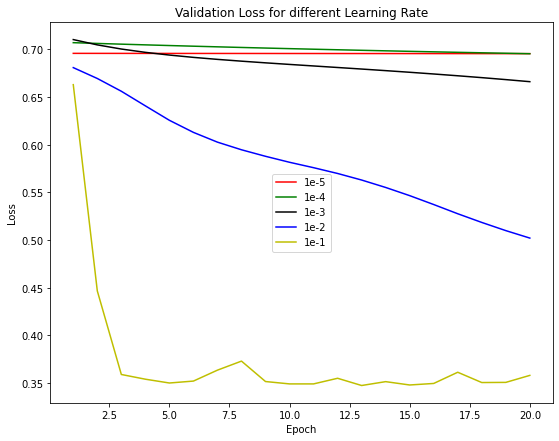

In [27]:
fig = plt.figure(figsize=(9,7))
epoches_lr = [i+1 for i in range(20)]
for valid_loss_hidden,color in zip(best_valid_loss_lr,["r",'g','k','b','y']):
    plt.plot(epoches_lr,valid_loss_hidden,color=color)

plt.title("Validation Loss for different Learning Rate")
plt.legend(['1e-5','1e-4','1e-3','1e-2','1e-1'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Thus we will use a Neural Network with a Learning rate of 1e-1 and a hidden layer size of 10

In [28]:
test_x = data[(85*len(data))//100:,:]
test_y = labels[(85*len(data))//100:]

In [29]:
train_losses_fin = []
test_accur_fin = []
train_accur_fin = []
test_losses_fin = []

learning_rate = 1e-1
model_fin = Net(input_shape=2,hidden_size=10)
optimizer_fin = torch.optim.SGD(model_fin.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

epochs = 100
for i in range(epochs):
    epoch_train_loss_fin = []
    for j,(x_train,y_train) in enumerate(train_dataloader):
        #calculate output
        output = model_fin(x_train.float())
        y_train = y_train.unsqueeze(1)
 
        #calculate loss
        train_loss = loss_fn(output,y_train.float())
        epoch_train_loss_fin.append(train_loss)
        #print(loss.item())
         
        
        #backprop
        optimizer_fin.zero_grad()
        train_loss.backward()
        optimizer_fin.step()
    
    epoch_train_loss_fin = [element.detach().numpy() for element in epoch_train_loss_fin]
    epoch_train_loss_fin = np.array(epoch_train_loss_fin)
    epoch_train_loss_fin = np.mean(epoch_train_loss_fin)

    #validation loss/accuracy
    predicted = model_fin(torch.tensor(test_x,dtype=torch.float32))
    test_acc = (predicted.reshape(-1).detach().numpy().round() == test_y).mean()
    dummy_y = torch.tensor(test_y)
    dummy_y = dummy_y.unsqueeze(1)
    test_loss = loss_fn(predicted,dummy_y.float())
    
    #Training dataset accuracy
    train_predicted = model_fin(torch.tensor(train_x,dtype=torch.float32))
    train_acc = (train_predicted.reshape(-1).detach().numpy().round() == train_y).mean()
    
    train_losses_fin.append(epoch_train_loss_fin)
    test_accur_fin.append(test_acc)
    test_losses_fin.append(test_loss)
    train_accur_fin.append(train_acc)


    #print(f"Epoch {i+1}\n-------------------------------")
    #print(f"Test loss : {test_loss} Test accuracy : {test_acc} \n")
    #print(f"Train loss : {epoch_train_loss_fin} Train accuracy : {train_acc} \n")


In [30]:
test_losses_fin = [element.detach().numpy() for element in test_losses_fin]

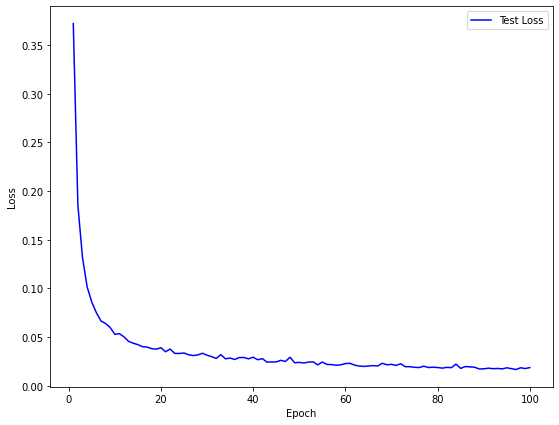

In [31]:
fig = plt.figure(figsize=(9,7))
plt.plot(epoches,test_losses_fin,color='b')
plt.legend(["Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

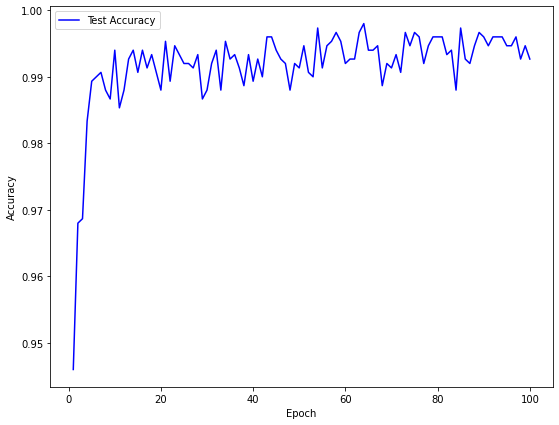

In [32]:
fig = plt.figure(figsize=(9,7))
plt.plot(epoches,test_accur_fin,color='b')
plt.legend(["Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()